In [126]:
def plot_history(history):    
    import matplotlib.pyplot as plt

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

### Tokenizer Toy Example

In [2]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('found %s unique tokens.' % len(word_index))

found 9 unique tokens.


In [23]:
max_length = 2
for i, sample in enumerate(samples):
    print(i)
    print(sample)
    print(sample.split())

0
The cat sat on the mat.
['The', 'cat', 'sat', 'on', 'the', 'mat.']
1
The dog ate my homework.
['The', 'dog', 'ate', 'my', 'homework.']


In [25]:
# one hot hashing (toy example)
# Does away with maintaining explicit word dict - which saves memory and allows online encoding (generate tokens immediately)
import numpy as np

dimensionality = 1000
max_length = 10

results  = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1
        

In [ ]:
# Using word embeddings 
# Low dimensional floating-point vectors - dense vectors
# 256-dimensional, 512-dimensional, 1024-dimensional
# Two methods: 
# 1. Learn word embeddings jointly with the main task. Random word vectors and learn word vectors same way as neural network
# 2. Load pre-computed word embeddings 

### Learning Word Embeddings
Easiest way to associate a dense vector is randomly.

Unfortunately, "accurate" and "exact" would end up with entirely different embeddings.

It is reasonable to learn a new embedding space with every new task. Just backprop it. 

In [26]:
from keras.layers import Embedding 

#Would 64 be equivalent to the number of 'filters' in a convnet?
embedding_layer = Embedding(1000, 64) #1000: 1 + maximum word index, 64: dimensionality of embeddings

# Embedding layer takes a 2D tensor of integers of shape (samples, sequence_length) 
# You could feed this batches with shapes (32, 10) or (64, 15) which is equivalent to 64 batches of sequences length 15
# All sequences in batch must be same length. Sequences shorter than others should be padded with 0s. Longer - truncated.
# RETURN 3D tensor (samples, sequence_length, embedding_dimensionality)

In [115]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 # Number of words to consider as features
maxlen = 1000 # Cut off text after this number of words among {among most common words}

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features) #loads data as list of integers
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [116]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 1000, 8)           80000     
_________________________________________________________________
flatten_6 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 8001      
Total params: 88,001
Trainable params: 88,001
Non-trainable params: 0
_________________________________________________________________


In [117]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 193us/step - loss: 0.5635 - acc: 0.7222 - val_loss: 0.3701 - val_acc: 0.8514
Epoch 2/10
20000/20000 [==============================] - 3s 171us/step - loss: 0.2867 - acc: 0.8887 - val_loss: 0.2835 - val_acc: 0.8846
Epoch 3/10
20000/20000 [==============================] - 3s 166us/step - loss: 0.2170 - acc: 0.9165 - val_loss: 0.2739 - val_acc: 0.8900
Epoch 4/10
20000/20000 [==============================] - 3s 170us/step - loss: 0.1808 - acc: 0.9323 - val_loss: 0.2720 - val_acc: 0.8932
Epoch 5/10
20000/20000 [==============================] - 3s 167us/step - loss: 0.1558 - acc: 0.9431 - val_loss: 0.2800 - val_acc: 0.8904
Epoch 6/10
20000/20000 [==============================] - 3s 168us/step - loss: 0.1363 - acc: 0.9496 - val_loss: 0.2873 - val_acc: 0.8904
Epoch 7/10
20000/20000 [==============================] - 3s 166us/step - loss: 0.1187 - acc: 0.9573 - val_loss: 0.3006 - v

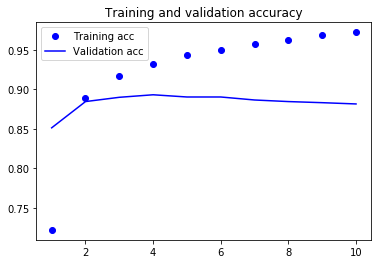

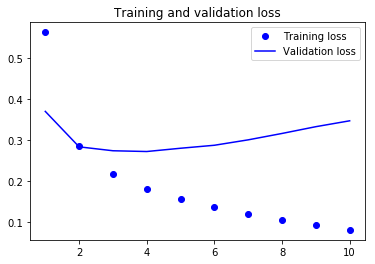

In [118]:
print(model.layers[0].get_weights()[0].shape)
#first_layer 10000,8
# first_layer_biases  = model.layers[0].get_weights()[1]
# second_layer_weights = model.layers[1].get_weights()[0]
# second_layer_biases  = model.layers[1].get_weights()[1]
plot_history(history)

### Pretrained word embeddings
Just like imagenet

Word2Vec: https://code.google.com/archive/p/word2vec
Global Vectors for Word Representation: GloVe, https://nlp.stanford.edu/projects/glove

In [127]:
# Processing labels of raw IMDB

import os
imdb_dir = r"C:\Users\pgbpr\Documents\Verusen\keras\imdb\aclImdb\test"

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(imdb_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            try:
                f = open(os.path.join(dir_name, fname), encoding='UTF8')
                texts.append(f.read())
                f.close()
                if label_type == 'neg':
                    labels.append(0)
                if label_type == 'pos':
                    labels.append(1)
            except:
                print(f'problem with {fname}')

In [128]:
print(len(labels))

17243


In [129]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # Cuts off reviews after 100 words
training_samples = 12000 # Trains on 12000 samples
validation_samples = 5243 # Validates on 5243 samples
max_words = 10000 # considers only top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens')

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print(f'Shape of data tensor: {data.shape}')
print(f'Shape of label tensor: {labels.shape}')

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 72603 unique tokens
Shape of data tensor: (17243, 100)
Shape of label tensor: (17243,)


In [130]:
glove_dir = r'C:\Users\pgbpr\Documents\Verusen\keras\glove'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coef = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coef
f.close()

print(f'Found {len(embeddings_index)} word vectors')
print(f'embeddings_index is a {type(embeddings_index)}')

Found 400000 word vectors
embeddings_index is a <class 'dict'>


In [131]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
print(f'shape of embedding_matrix {embedding_matrix.shape}')

shape of embedding_matrix (10000, 100)


In [132]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen)) #10000, 100, input_length = 20
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_8 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [133]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 12000 samples, validate on 5243 samples
Epoch 1/10
12000/12000 [==============================] - 3s 227us/step - loss: 0.5691 - acc: 0.7293 - val_loss: 0.5213 - val_acc: 0.7410
Epoch 2/10
12000/12000 [==============================] - 2s 182us/step - loss: 0.4619 - acc: 0.7854 - val_loss: 0.5571 - val_acc: 0.7084
Epoch 3/10
12000/12000 [==============================] - 2s 181us/step - loss: 0.4038 - acc: 0.8189 - val_loss: 0.5022 - val_acc: 0.7639
Epoch 4/10
12000/12000 [==============================] - 2s 180us/step - loss: 0.3569 - acc: 0.8516 - val_loss: 0.5475 - val_acc: 0.7669
Epoch 5/10
12000/12000 [==============================] - 2s 181us/step - loss: 0.3098 - acc: 0.8746 - val_loss: 0.5656 - val_acc: 0.7511
Epoch 6/10
12000/12000 [==============================] - 2s 179us/step - loss: 0.2710 - acc: 0.8940 - val_loss: 0.6555 - val_acc: 0.7503
Epoch 7/10
12000/12000 [==============================] - 2s 179us/step - loss: 0.2275 - acc: 0.9072 - val_loss: 0.9103 - v

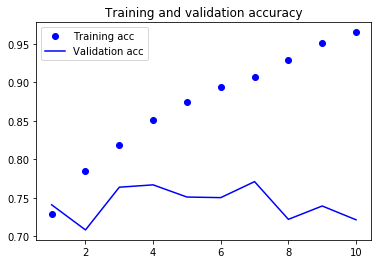

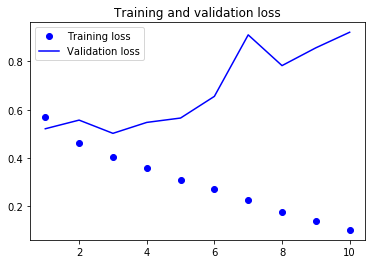

In [134]:
plot_history(history)

In [135]:
# Without pretrained word embeddings

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen)) #10000, 100, input_length = 20
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Train on 12000 samples, validate on 5243 samples
Epoch 1/10
12000/12000 [==============================] - 4s 294us/step - loss: 0.4095 - acc: 0.8125 - val_loss: 0.2975 - val_acc: 0.8697
Epoch 2/10
12000/12000 [==============================] - 3s 232us/step - loss: 0.1228 - acc: 0.9571 - val_loss: 0.3462 - val_acc: 0.8636
Epoch 3/10
12000/12000 [==============================] - 3s 235us/step - loss: 0.0110 - acc: 0.9978 - val_loss: 0.5950 - val_acc: 0.8486
Epoch 4/10
12000/12000 [==============================] - 3s 233us/step - loss: 0.0011 - acc: 0.9998 - val_loss: 0.6256 - val_acc: 0.8566
Epoch 5/10
12000/12000 [==============================] - 3s 234us/step - loss: 5.3767e-05 - acc: 1.0000 - val_loss: 0.7049 - val_acc: 0.8535
Epoch 6/10
12000/12000 [==============================] - 3s 235us/step - loss: 4.9140e-05 - acc: 1.0000 - val_loss: 0.7883 - val_acc: 0.8562
Epoch 7/10
12000/12000 [==============================] - 3s 233us/step - loss: 3.2656e-07 - acc: 1.0000 - val_loss

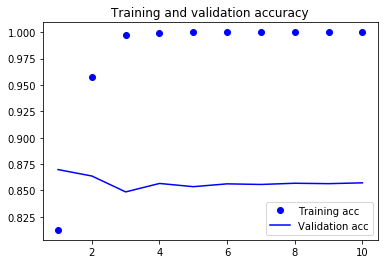

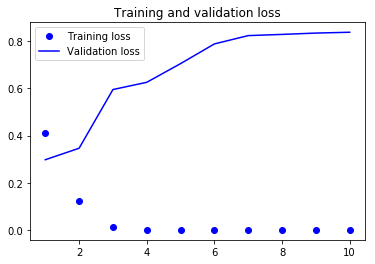

In [136]:
plot_history(history)